In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Tạo kết nối SQLite
conn = sqlite3.connect(":memory:")

### Đọc dữ liệu

In [3]:
df = pd.read_csv(r'C:\Users\ADMIN\Repo\Data_analysis\du_lieu_diem_thi_2017_2020.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15708\2538395428.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ADMIN\Repo\Data_analysis\du_lieu_diem_thi_2017_2020.csv')


In [4]:
df.head(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu
0,2017,1000001,6.4,6.0,NaN,NaN,NaN,4.0,6.0,7.25,8.8,NaN
1,2017,1000002,6.0,7.0,NaN,NaN,NaN,4.5,8.5,8.75,7.6,NaN


In [5]:
len(df)

3538529

### 1.1. So sánh sự thay đổi về số lượng thí sinh qua từng năm

nam_thi
2017    856123
2018    921908
2019    882326
2020    900488
Name: sbd, dtype: int64


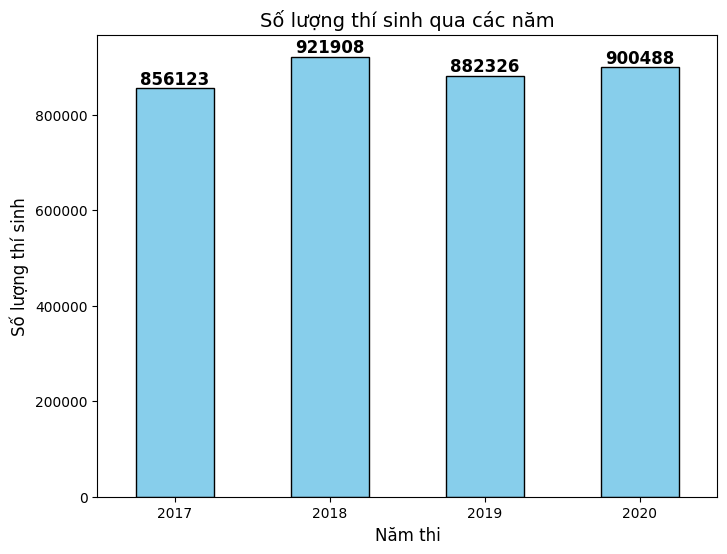

In [6]:
df['nam_thi'] = df['nam_thi'].astype(str)

# Đếm số lượng thí sinh qua từng năm
thong_ke_thi_sinh = df.groupby('nam_thi')['sbd'].nunique()
thong_ke_thi_sinh['2020'] = thong_ke_thi_sinh['2020'] + 30000   # Thiếu dữ liệu của 30k thí sinh Đà Nẵng ở kỳ thi 2020

# In kết quả
print(thong_ke_thi_sinh)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = thong_ke_thi_sinh.plot(kind='bar', color='skyblue', edgecolor='black')  # Thêm border cho các cột

# Thêm số lượng lên trên mỗi cột (nằm ngang)
for i, v in enumerate(thong_ke_thi_sinh):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12, rotation=0, color='black', fontweight='bold')

# Thêm tiêu đề và nhãn
plt.title('Số lượng thí sinh qua các năm', fontsize=14)
plt.xlabel('Năm thi', fontsize=12)
plt.ylabel('Số lượng thí sinh', fontsize=12)

plt.xticks(rotation=0)  # Đặt góc nhãn là 0 độ (nằm ngang)

# Hiển thị biểu đồ
plt.show()


In [7]:
thong_ke_thi_sinh

nam_thi
2017    856123
2018    921908
2019    882326
2020    900488
Name: sbd, dtype: int64

### 1.2. Tỷ lệ thay đổi số lượng thí sinh qua các năm

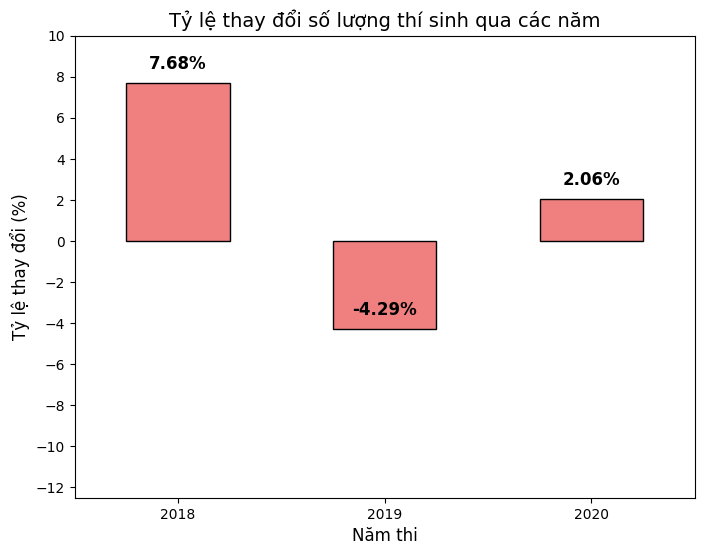

In [8]:
# Đếm số lượng thí sinh qua từng năm
thong_ke_thi_sinh = df.groupby('nam_thi')['sbd'].nunique()
thong_ke_thi_sinh['2020'] = thong_ke_thi_sinh['2020'] + 30000   # Thiếu dữ liệu của 30k thí sinh Đà Nẵng ở kỳ thi 2020

# Tính tỷ lệ thay đổi (độ lệch phần trăm) giữa các năm
ty_le_thay_doi = thong_ke_thi_sinh.pct_change().dropna() * 100  # pct_change() tính tỷ lệ thay đổi, *100 để đổi sang phần trăm

# Vẽ biểu đồ tỷ lệ thay đổi
plt.figure(figsize=(8, 6))
ax = ty_le_thay_doi.plot(kind='bar', color='lightcoral', edgecolor='black')

# Thêm số lượng lên trên mỗi cột (nằm ngang)
for i, v in enumerate(ty_le_thay_doi):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, rotation=0, color='black', fontweight='bold')

# Thêm tiêu đề và nhãn
plt.title('Tỷ lệ thay đổi số lượng thí sinh qua các năm', fontsize=14)
plt.xlabel('Năm thi', fontsize=12)
plt.ylabel('Tỷ lệ thay đổi (%)', fontsize=12)

# Đảm bảo nhãn trên trục x nằm ngang
plt.xticks(rotation=0)

# Thiết lập giới hạn trục y và các vạch
plt.ylim(-12.5, 10)
plt.yticks(range(-12, 11, 2))  # Các vạch cách nhau 2.5, từ -12.5 đến 10

plt.show()

Nhận xét về sự thay đổi về số lượng thí sinh qua các năm:
+ Số lượng thí sinh giữa các năm có sự biến động nhẹ, năm 2021 tăng 7.68%, năm 2019 giảm 11.94%, và năm 2020 tăng 7.22%.
+ Cùng với đó, việc số lượng thí sinh năm 2020 tăng hơn so với số lượng thí sinh năm 2019 có thể dẫn đến việc mức độ cạnh tranh tăng lên ở năm 2020.
- - -

### 2. Số lượng thí sinh của các khu vực thay đổi thế nào qua từng năm
+ Trung du và miền núi phía Bắc (14 tỉnh): Hà Giang, Cao Bằng, Bắc Kạn, Tuyên Quang, Lào Cai, Yên Bái, Thái Nguyên, Lạng Sơn, Bắc Giang, Phú Thọ, Điện Biên, Lai Châu, Sơn La, Hoà Bình
+ Đồng bằng sông Hồng (11 tỉnh/thành): Hà Nội, Vĩnh Phúc, Bắc Ninh, Quảng Ninh, Hải Dương, Hải Phòng, Hưng Yên, Thái Bình, Hà Nam, Nam Định, Ninh Bình
+ Bắc Trung Bộ (6 tỉnh): Thanh Hóa, Nghệ An, Hà Tĩnh, Quảng Bình, Quảng Trị, Thừa Thiên - Huế
+ Duyên hải Nam Trung Bộ (8 tỉnh/thành): Quảng Nam, Đà Nẵng, Quảng Ngãi, Bình Định, Phú Yên, Khánh Hòa, Ninh Thuận, Bình Thuận
+ Tây Nguyên (5 tỉnh): Kon Tum, Gia Lai, Đắk Lắk, Đắk Nông, Lâm Đồng
+ Đông Nam Bộ (6 tỉnh/thành): Hồ Chí Minh, Đồng Nai, Bình Dương, Bà Rịa-Vũng Tàu, Bình Phước, Tây Ninh
+ Đồng bằng sông Cửu Long (13 tỉnh/thành): Long An, Đồng Tháp, An Giang, Kiên Giang, Cà Mau, Bạc Liêu, Sóc Trăng, Bến Tre, Trà Vinh, Vĩnh Long, Tiền Giang, Hậu Giang, Cần Thơ

In [9]:
trung_du_va_mien_nui_phia_bac = ["Hà Giang", "Cao Bằng", "Bắc Kạn", "Tuyên Quang", "Lào Cai", "Yên Bái", "Thái Nguyên", "Lạng Sơn", "Bắc Giang", "Phú Thọ", "Điện Biên", "Lai Châu", "Sơn La", "Hòa Bình"]
dong_bang_song_hong = ["Hà Nội", "Vĩnh Phúc", "Bắc Ninh", "Quảng Ninh", "Hải Dương", "Hải Phòng", "Hưng Yên", "Thái Bình", "Hà Nam", "Nam Định", "Ninh Bình"]
bac_trung_bo = ["Thanh Hóa", "Nghệ An", "Hà Tĩnh", "Quảng Bình", "Quảng Trị", "Thừa Thiên-Huế"]
duyen_hai_nam_trung_bo = ["Quảng Nam", "Đà Nẵng", "Quảng Ngãi", "Bình Định", "Phú Yên", "Khánh Hòa", "Ninh Thuận", "Bình Thuận"]
tay_nguyen = ["Kon Tum", "Gia Lai", "Đắk Lắk", "Đắk Nông", "Lâm Đồng"]
dong_nam_bo = ["Hồ Chí Minh", "Đồng Nai", "Bình Dương", "Bà Rịa-Vũng Tàu", "Bình Phước", "Tây Ninh"]
dong_bang_song_cuu_long = ["Long An", "Đồng Tháp", "An Giang", "Kiên Giang", "Cà Mau", "Bạc Liêu", "Sóc Trăng", "Bến Tre", "Trà Vinh", "Vĩnh Long", "Tiền Giang", "Hậu Giang", "Cần Thơ"]

In [10]:
# index + 1 là mã tỉnh
tinh = ['Hà Nội', 'Hồ Chí Minh', 'Hải Phòng', 'Đà Nẵng', 'Hà Giang', 'Cao Bằng', 'Lai Châu', 'Lào Cai', 'Tuyên Quang', 'Lạng Sơn', 'Bắc Kạn', 'Thái Nguyên', 'Yên Bái', 'Sơn La', 'Phú Thọ', 
        'Vĩnh Phúc', 'Quảng Ninh', 'Bắc Giang', 'Bắc Ninh', 'Hải Dương', 'Hưng Yên', 'Hòa Bình', 'Hà Nam', 'Nam Định', 'Thái Bình', 'Ninh Bình', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 
        'Quảng Bình', 'Quảng Trị', 'Thừa Thiên-Huế', 'Quảng Nam', 'Quảng Ngãi', 'Kon Tum', 'Bình Định', 'Gia Lai', 'Phú Yên', 'Đắk Lắk', 'Khánh Hòa', 'Lâm Đồng', 'Bình Phước', 'Bình Dương', 
        'Ninh Thuận', 'Tây Ninh', 'Bình Thuận', 'Đồng Nai', 'Long An', 'Đồng Tháp', 'An Giang', 'Bà Rịa-Vũng Tàu', 'Tiền Giang', 'Kiên Giang', 'Cần Thơ', 'Bến Tre', 'Vĩnh Long', 'Trà Vinh', 
        'Sóc Trăng', 'Bạc Liêu', 'Cà Mau', 'Điện Biên', 'Đắk Nông', 'Hậu Giang']

print(len(tinh))

63


In [11]:
# Xác định mã tỉnh của thí sinh
ma_tinh_trung_du_va_mien_nui_phia_bac = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in trung_du_va_mien_nui_phia_bac]
ma_tinh_dong_bang_song_hong = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in dong_bang_song_hong]
ma_tinh_bac_trung_bo = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in bac_trung_bo]
ma_tinh_duyen_hai_nam_trung_bo = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in duyen_hai_nam_trung_bo]
ma_tinh_tay_nguyen = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in tay_nguyen]
ma_tinh_dong_nam_bo = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in dong_nam_bo]
ma_tinh_dong_bang_song_cuu_long = [tinh.index(i)+1 if tinh.index(i)+1 < 20 else tinh.index(i)+2 for i in dong_bang_song_cuu_long]

In [12]:
df2 = df.copy()

df2['ma_tinh'] = df2['sbd'].astype(str).str[:-6].astype(int)
df2['sbd_khong_chua_ma_tinh'] = df2['sbd'].astype(str).str[-6:] # Trước đây là 28020138 thì giờ là 020138 (bỏ mã tỉnh 28)

# Đổi cột ma_tinh và sbd_khong_chua_ma_tinh lên đầu
cols = df2.columns.tolist()
cols = cols[:2] + cols[-2:] + cols[2:-2]
df2 = df2[cols]

# Xoá cột sbd
df2.drop('sbd', axis=1, inplace=True)

# Đổi tên cột sbd_khong_chua_ma_tinh thành sbd
df2.rename(columns={'sbd_khong_chua_ma_tinh': 'sbd'}, inplace=True)


In [13]:
# Thêm cột khu_vuc vao df2
df2.loc[df2['ma_tinh'].isin(ma_tinh_trung_du_va_mien_nui_phia_bac), 'khu_vuc'] = 'Trung du và miền núi phía Bắc'
df2.loc[df2['ma_tinh'].isin(ma_tinh_dong_bang_song_hong), 'khu_vuc'] = 'Đồng bằng sông Hồng'
df2.loc[df2['ma_tinh'].isin(ma_tinh_bac_trung_bo), 'khu_vuc'] = 'Bắc Trung Bộ'
df2.loc[df2['ma_tinh'].isin(ma_tinh_duyen_hai_nam_trung_bo), 'khu_vuc'] = 'Duyên hải Nam Trung Bộ'
df2.loc[df2['ma_tinh'].isin(ma_tinh_tay_nguyen), 'khu_vuc'] = 'Tây Nguyên'
df2.loc[df2['ma_tinh'].isin(ma_tinh_dong_nam_bo), 'khu_vuc'] = 'Đông Nam Bộ'
df2.loc[df2['ma_tinh'].isin(ma_tinh_dong_bang_song_cuu_long), 'khu_vuc'] = 'Đồng bằng sông Cửu Long'


In [14]:
df2.head(2)

,nam_thi,ma_tinh,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khu_vuc
0,2017,1,000001,6.4,6.0,NaN,NaN,NaN,4.0,6.0,7.25,8.8,NaN,Đồng bằng sông Hồng
1,2017,1,000002,6.0,7.0,NaN,NaN,NaN,4.5,8.5,8.75,7.6,NaN,Đồng bằng sông Hồng


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15708\2334847019.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  thong_ke_thi_sinh_khu_vuc['Duyên hải Nam Trung Bộ']['2020'] = thong_ke_thi_sinh_khu_vuc['Duyên hải Nam Trung Bộ']['2020'] + 3000

<Figure size 1200x800 with 0 Axes>

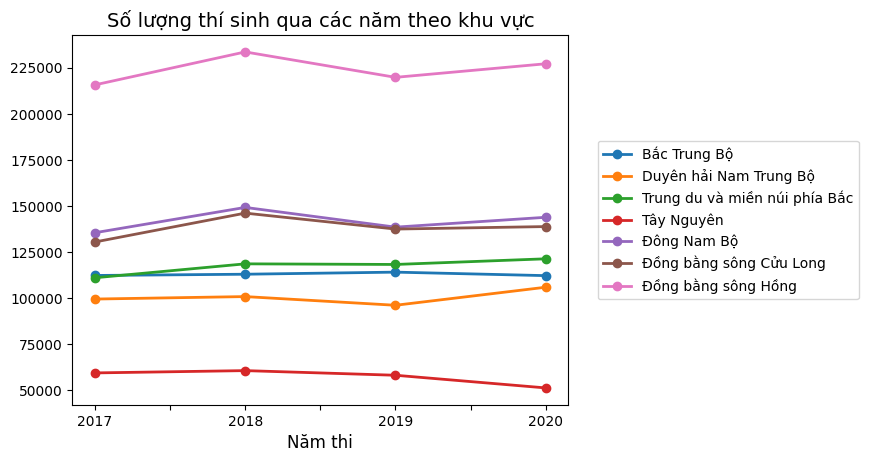

In [15]:
# Số lượng thí sinh của từng khu vực qua từng năm
thong_ke_thi_sinh_khu_vuc = df2.groupby(['nam_thi', 'khu_vuc'])['sbd'].count()
thong_ke_thi_sinh['2020'] = thong_ke_thi_sinh['2020'] + 30000   # Thiếu dữ liệu của 30k thí sinh Đà Nẵng ở kỳ thi 2020

# Chuyển thành
thong_ke_thi_sinh_khu_vuc = thong_ke_thi_sinh_khu_vuc.unstack()
thong_ke_thi_sinh_khu_vuc['Duyên hải Nam Trung Bộ']['2020'] = thong_ke_thi_sinh_khu_vuc['Duyên hải Nam Trung Bộ']['2020'] + 30000     # Thiếu 30k thí sinh Đà Nẵng ở kỳ thi 2020

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
thong_ke_thi_sinh_khu_vuc.plot(kind='line', marker='o', linewidth=2)
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5)) # Chuyển chú thích sang phải ngoài biểu đồ

# Thêm tiêu đề và nhãn
plt.title('Số lượng thí sinh qua các năm theo khu vực', fontsize=14)
plt.xlabel('Năm thi', fontsize=12)

# Đảm bảo nhãn trên trục x nằm ngang
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()



In [16]:
thong_ke_thi_sinh_khu_vuc

khu_vuc,Bắc Trung Bộ,Duyên hải Nam Trung Bộ,Trung du và miền núi phía Bắc,Tây Nguyên,Đông Nam Bộ,Đồng bằng sông Cửu Long,Đồng bằng sông Hồng
nam_thi,,,,,,,
2017,112280,99483,111033,59406,135470,130443,215692
2018,112954,100823,118590,60651,149206,146110,233574
2019,114088,96109,118251,58136,138502,137458,219782
2020,112189,105906,121321,51263,143850,138811,227148


Nhận xét về số lượng thí sinh của từng khu vực qua từng năm:
+ Số lượng thí sinh ở các khu vực duy trì ở mức độ tương đối ổn định qua các năm.

---

### 3. Sự thay đổi về điểm số từng môn trong 4 năm

In [17]:
cols_to_average = ['toan', 'ngu_van', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd', 'ngoai_ngu']

# Tính điểm trung bình của từng môn theo năm
df3 = df.groupby('nam_thi')[cols_to_average].mean()

# Đổi tên các cột để rõ ràng hơn
df3.columns = ['avg_' + col for col in df3.columns]

df3 = df3.reset_index()

# Hiển thị DataFrame mới
df3


,nam_thi,avg_toan,avg_ngu_van,avg_vat_ly,avg_hoa_hoc,avg_sinh_hoc,avg_lich_su,avg_dia_ly,avg_gdcd,avg_ngoai_ngu
0,2017,5.183661,5.508776,5.344865,5.323266,4.754240,4.597183,6.261364,7.793634,4.470171
1,2018,4.854679,5.449119,4.971223,4.873633,4.543563,3.788339,5.463164,7.123753,3.908905
2,2019,5.635582,5.484195,5.568007,5.354005,4.683130,4.302082,5.996745,7.372422,4.363530
3,2020,6.662256,6.601809,6.717955,6.705179,5.588002,5.181079,6.773191,8.125130,4.568325


In [18]:
df3.head()

,nam_thi,avg_toan,avg_ngu_van,avg_vat_ly,avg_hoa_hoc,avg_sinh_hoc,avg_lich_su,avg_dia_ly,avg_gdcd,avg_ngoai_ngu
0,2017,5.183661,5.508776,5.344865,5.323266,4.754240,4.597183,6.261364,7.793634,4.470171
1,2018,4.854679,5.449119,4.971223,4.873633,4.543563,3.788339,5.463164,7.123753,3.908905
2,2019,5.635582,5.484195,5.568007,5.354005,4.683130,4.302082,5.996745,7.372422,4.363530
3,2020,6.662256,6.601809,6.717955,6.705179,5.588002,5.181079,6.773191,8.125130,4.568325


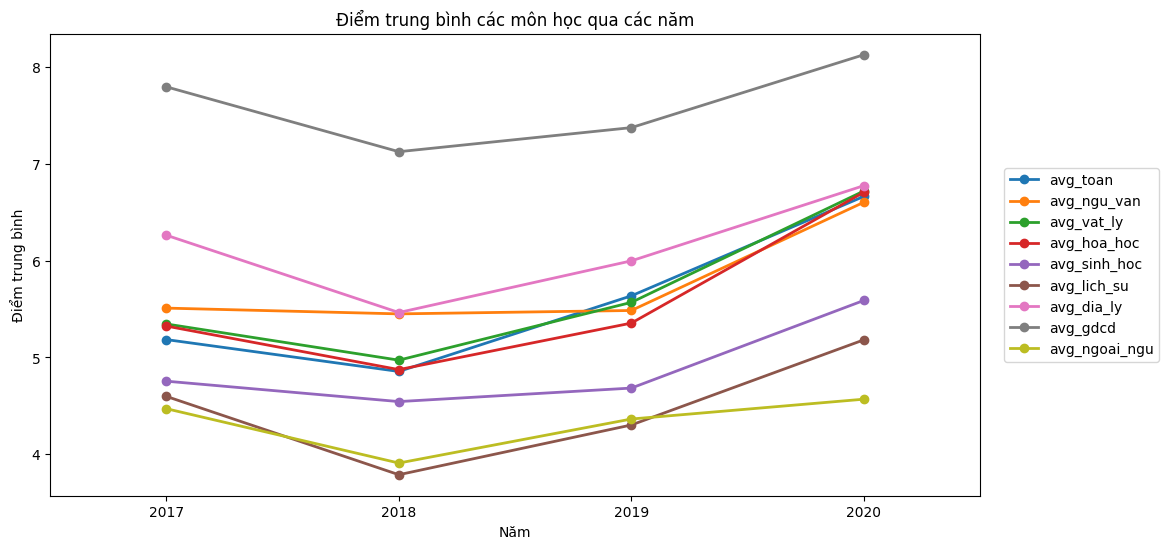

In [19]:
# Chọn các cột cần vẽ
cols_to_plot = ['avg_toan', 'avg_ngu_van', 'avg_vat_ly', 'avg_hoa_hoc', 'avg_sinh_hoc', 'avg_lich_su', 'avg_dia_ly', 'avg_gdcd', 'avg_ngoai_ngu']
# cols_to_plot = ['avg_toan', 'avg_vat_ly', 'avg_hoa_hoc', 'avg_sinh_hoc']

# Vẽ biểu đồ
df3['nam_thi'] = df3['nam_thi'].astype(int)
plt.rcParams['figure.figsize'] = (12, 6)
df3.plot(x='nam_thi', y=cols_to_plot, kind='line', linewidth=2, marker='o')
plt.xlim(df3['nam_thi'].min() - 0.5, df3['nam_thi'].max() + 0.5)    # Đặt giới hạn cho trục hoành
plt.xticks(df3['nam_thi'])  # Tùy chỉnh các nhãn trên trục hoành

plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5)) # Chuyển chú thích sang phải ngoài biểu đồ

# Đặt tiêu đề và nhãn cho các trục
plt.title('Điểm trung bình các môn học qua các năm')
plt.xlabel('Năm')
plt.ylabel('Điểm trung bình')

# Hiển thị biểu đồ
plt.show()

---

### 4. Sự cạnh tranh ở khối A thay đổi thế nào khi so sánh điểm thi 2019 và 2020

In [20]:
df4 = df.copy()
df4['nam_thi'] = df4['nam_thi'].astype(int)
# Tạo cột khoi_A và tính toán
df4['khoi_A'] = df4[['toan', 'vat_ly', 'hoa_hoc']].sum(axis=1)

# Xử lý trường hợp thiếu dữ liệu
df4['khoi_A'] = df4['khoi_A'].where(df4[['toan', 'vat_ly', 'hoa_hoc']].notnull().all(axis=1), np.nan)

In [21]:
df4.tail(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_A
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1,18.75
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1,NaN


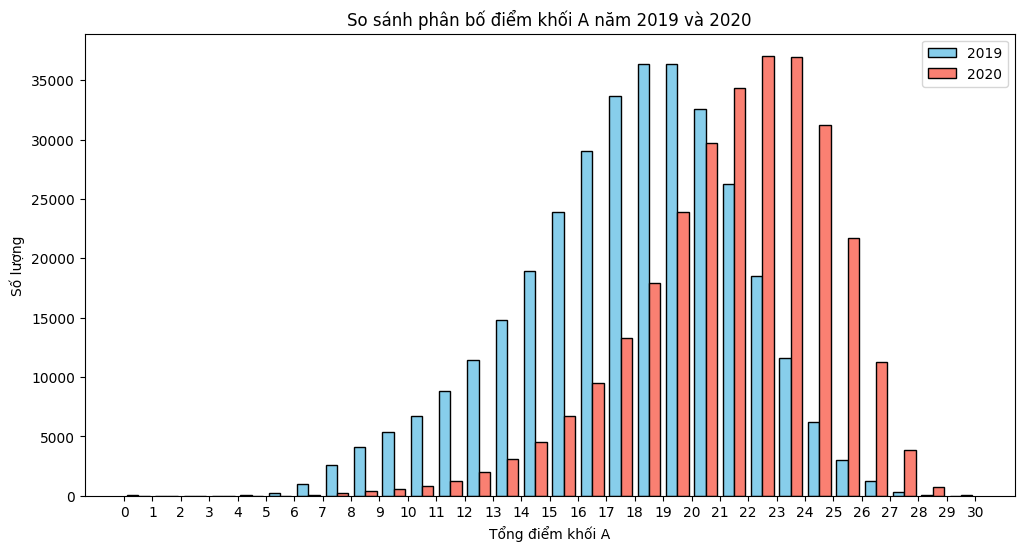

In [22]:
# Tạo các bins
bins = np.arange(0, 31)

khoi_A_2020 = df4[df4['nam_thi'] == 2020]['khoi_A']
khoi_A_2019 = df4[df4['nam_thi'] == 2019]['khoi_A']

# Vẽ biểu đồ cột đôi
plt.hist([khoi_A_2019, khoi_A_2020], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', rwidth=0.8)

# Thêm nhãn và tiêu đề
plt.xlabel('Tổng điểm khối A')
plt.ylabel('Số lượng')
plt.title('So sánh phân bố điểm khối A năm 2019 và 2020')

# Thêm chú thích
plt.legend(['2019', '2020'])

# Điều chỉnh trục x
plt.xticks(np.arange(0, 31))

# Hiển thị biểu đồ
plt.show()

---

### 5. Sự cạnh tranh ở khối A1 thay đổi thế nào khi so sánh điểm thi 2019 và 2020

In [23]:
df5 = df.copy()
df5['nam_thi'] = df5['nam_thi'].astype(int)
# Tạo cột khoi_A1 và tính toán
df5['khoi_A1'] = df5[['toan', 'vat_ly', 'ngoai_ngu']].sum(axis=1)

# Xử lý trường hợp thiếu dữ liệu
df5['khoi_A1'] = df5['khoi_A1'].where(df5[['toan', 'vat_ly', 'ngoai_ngu']].notnull().all(axis=1), np.nan)

In [24]:
df5.tail(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_A1
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1,16.45
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1,NaN


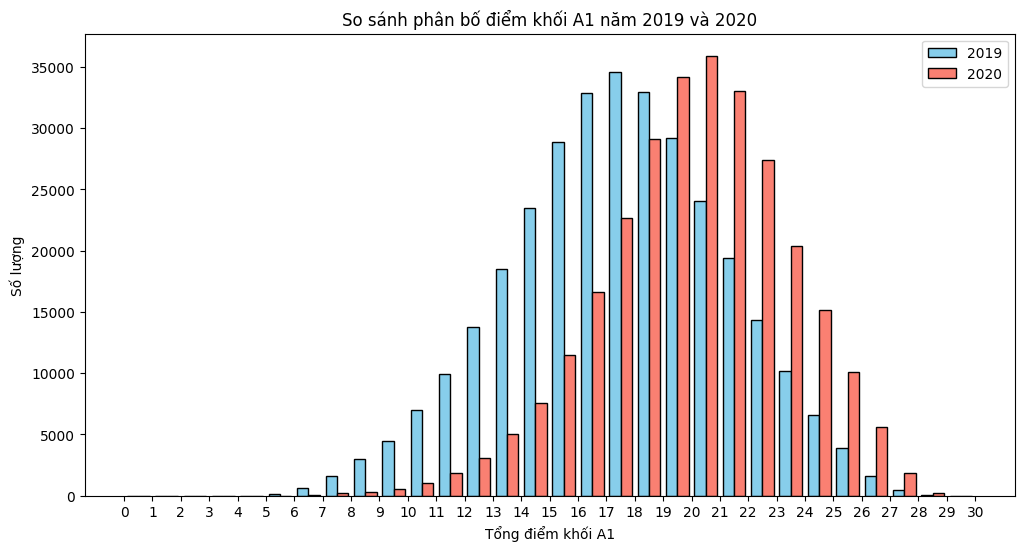

In [25]:
# Tạo các bins
bins = np.arange(0, 31)

khoi_A1_2019 = df5[df5['nam_thi'] == 2019]['khoi_A1']
khoi_A1_2020 = df5[df5['nam_thi'] == 2020]['khoi_A1']

# Vẽ biểu đồ cột đôi
plt.hist([khoi_A1_2019, khoi_A1_2020], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', rwidth=0.8)

# Thêm nhãn và tiêu đề
plt.xlabel('Tổng điểm khối A1')
plt.ylabel('Số lượng')
plt.title('So sánh phân bố điểm khối A1 năm 2019 và 2020')

# Thêm chú thích
plt.legend(['2019', '2020'])

# Điều chỉnh trục x
plt.xticks(np.arange(0, 31))

# Hiển thị biểu đồ
plt.show()

---

### 6. Sự cạnh tranh ở khối B thay đổi thế nào khi so sánh điểm thi 2019 và 2020

In [26]:
df6 = df.copy()
df6['nam_thi'] = df6['nam_thi'].astype(int)
# Tạo cột khoi_A1 và tính toán
df6['khoi_B'] = df6[['toan', 'hoa_hoc', 'sinh_hoc']].sum(axis=1)

# Xử lý trường hợp thiếu dữ liệu
df6['khoi_B'] = df6['khoi_B'].where(df6[['toan', 'hoa_hoc', 'sinh_hoc']].notnull().all(axis=1), np.nan)

In [27]:
df6.tail(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_B
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1,16.25
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1,NaN


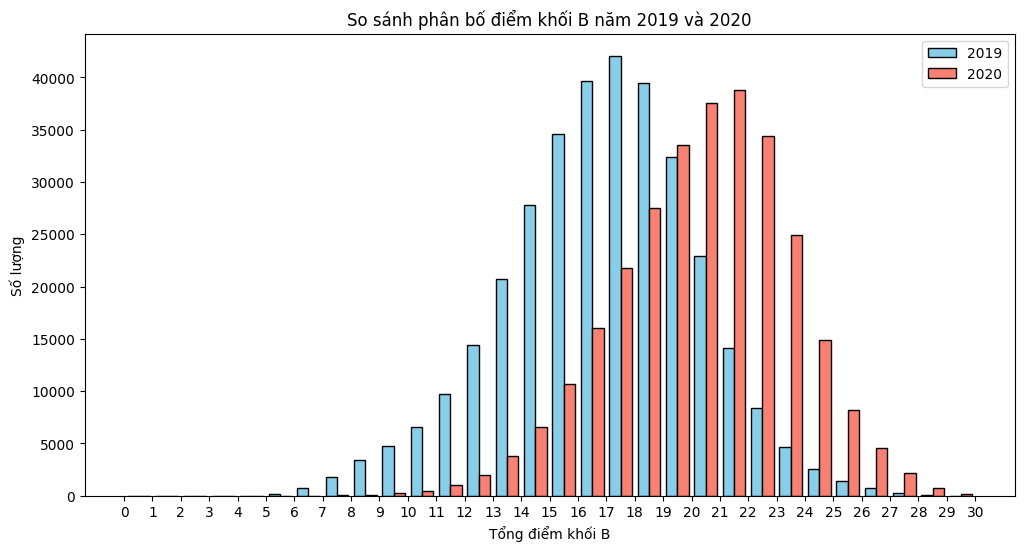

In [28]:
# Tạo các bins
bins = np.arange(0, 31)

khoi_B_2019 = df6[df6['nam_thi'] == 2019]['khoi_B']
khoi_B_2020 = df6[df6['nam_thi'] == 2020]['khoi_B']

# Vẽ biểu đồ cột đôi
plt.hist([khoi_B_2019, khoi_B_2020], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', rwidth=0.8)

# Thêm nhãn và tiêu đề
plt.xlabel('Tổng điểm khối B')
plt.ylabel('Số lượng')
plt.title('So sánh phân bố điểm khối B năm 2019 và 2020')

# Thêm chú thích
plt.legend(['2019', '2020'])

# Điều chỉnh trục x
plt.xticks(np.arange(0, 31))

# Hiển thị biểu đồ
plt.show()

---

### 7. Sự cạnh tranh ở khối C thay đổi thế nào khi so sánh điểm thi 2019 và 2020

In [29]:
df7 = df.copy()
df7['nam_thi'] = df7['nam_thi'].astype(int)
# Tạo cột khoi_C và tính toán
df7['khoi_C'] = df7[['ngu_van', 'lich_su', 'dia_ly']].sum(axis=1)

# Xử lý trường hợp thiếu dữ liệu
df7['khoi_C'] = df7['khoi_C'].where(df7[['ngu_van', 'lich_su', 'dia_ly']].notnull().all(axis=1), np.nan)

In [30]:
df7.tail(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_C
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1,NaN
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1,19.25


In [43]:
# Tạo các bins
# bins = np.arange(0, 31)

# # Lấy dữ liệu khối C cho các năm
# khoi_C_2019 = df7[df7['nam_thi'] == 2019]['khoi_C']
# khoi_C_2020 = df7[df7['nam_thi'] == 2020]['khoi_C']

# # Tính tần suất cho từng bin
# freq_2019, _ = np.histogram(khoi_C_2019, bins=bins)
# freq_2020, _ = np.histogram(khoi_C_2020, bins=bins)

# # Tính tọa độ trung tâm của các bins
# bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_centers)

# # Vẽ biểu đồ đường
# plt.plot(bin_centers, freq_2019, color='skyblue', label='2019', marker='o')
# plt.plot(bin_centers, freq_2020, color='salmon', label='2020', marker='o')

# # Thêm nhãn và tiêu đề
# plt.xlabel('Tổng điểm khối C')
# plt.ylabel('Số lượng')
# plt.title('So sánh phân bố điểm khối C năm 2019 và 2020')

# # Thêm chú thích
# plt.legend()

# # Điều chỉnh trục x
# plt.xticks(np.arange(0, 31))

# # Hiển thị biểu đồ
# plt.show()


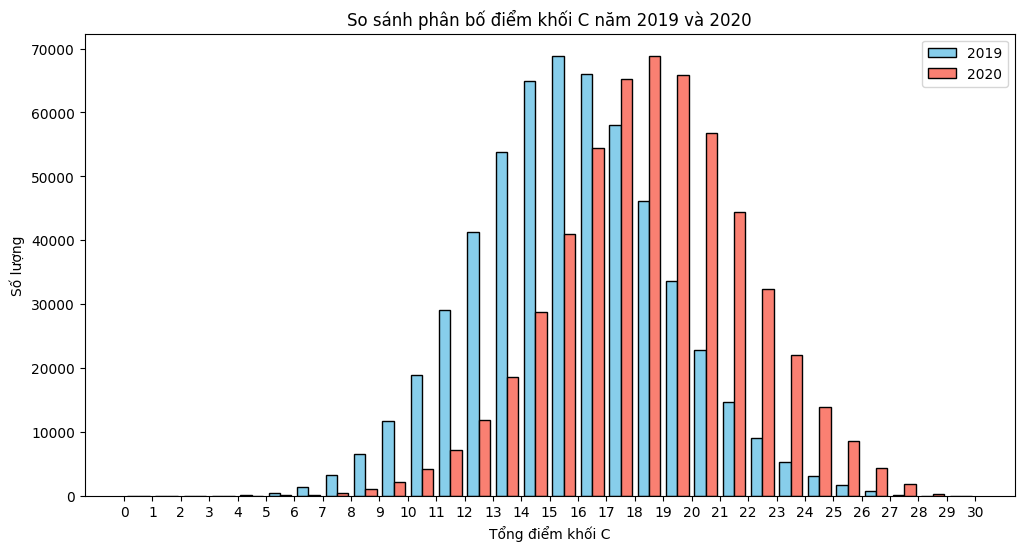

In [32]:
# Tạo các bins
bins = np.arange(0, 31)

khoi_C_2019 = df7[df7['nam_thi'] == 2019]['khoi_C']
khoi_C_2020 = df7[df7['nam_thi'] == 2020]['khoi_C']

# Vẽ biểu đồ cột đôi
plt.hist([khoi_C_2019, khoi_C_2020], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', rwidth=0.8)

# Thêm nhãn và tiêu đề
plt.xlabel('Tổng điểm khối C')
plt.ylabel('Số lượng')
plt.title('So sánh phân bố điểm khối C năm 2019 và 2020')

# Thêm chú thích
plt.legend(['2019', '2020'])

# Điều chỉnh trục x
plt.xticks(np.arange(0, 31))

# Hiển thị biểu đồ
plt.show()

In [33]:
df7[df7['toan'] == 4.8]

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_C
57,2017,1000058,4.8,6.25,NaN,NaN,NaN,2.00,4.00,7.25,3.8,NaN,12.25
98,2017,1000099,4.8,4.25,NaN,NaN,NaN,3.00,7.00,8.25,4.8,NaN,14.25
111,2017,1000112,4.8,9.00,NaN,NaN,NaN,7.00,8.25,9.00,8.2,NaN,24.25
214,2017,1000215,4.8,7.75,NaN,NaN,NaN,3.75,5.75,8.00,7.4,NaN,17.25
221,2017,1000222,4.8,7.75,NaN,NaN,NaN,3.00,6.50,7.75,8.4,NaN,17.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3538305,2020,64005598,4.8,6.00,4.0,5.25,4.5,NaN,NaN,NaN,2.4,N1,NaN
3538348,2020,64005641,4.8,5.50,NaN,NaN,NaN,5.75,4.75,NaN,NaN,NaN,16.00
3538419,2020,64005712,4.8,5.00,NaN,NaN,NaN,5.25,5.50,NaN,NaN,NaN,15.75
3538445,2020,64005738,4.8,NaN,NaN,NaN,NaN,4.00,4.50,8.00,2.4,N1,NaN


In [44]:
# # Tạo các bins
# bins = np.arange(0.1, 10.2, 0.2)  # Điểm từ 0 đến 10, bước nhảy 0.2

# # Lấy dữ liệu môn Toán cho các năm
# toan_2019 = df7[df7['nam_thi'] == 2019]['toan']
# toan_2020 = df7[df7['nam_thi'] == 2020]['toan']

# # Tính tần suất cho từng bin
# freq_2019, _ = np.histogram(toan_2019, bins=bins)
# freq_2020, _ = np.histogram(toan_2020, bins=bins)

# # Tính tọa độ trung tâm của các bins
# bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_centers)

# # Vẽ biểu đồ đường
# plt.plot(bin_centers, freq_2019, color='skyblue', label='2019', marker='o')
# plt.plot(bin_centers, freq_2020, color='salmon', label='2020', marker='o')

# # Thêm nhãn và tiêu đề
# plt.xlabel('Điểm môn Toán')
# plt.ylabel('Số lượng thí sinh')
# plt.title('So sánh phân bố điểm môn Toán năm 2019 và 2020')

# # Thêm chú thích
# plt.legend()

# # Điều chỉnh trục x
# plt.xticks(np.arange(0, 11, 0.4))  # Trục x từ 0 đến 10 với bước nhảy 1

# # Hiển thị biểu đồ
# plt.show()


---

### 8. Sự cạnh tranh ở khối D thay đổi thế nào khi so sánh điểm thi 2019 và 2020

In [35]:
df8 = df.copy()
df8['nam_thi'] = df8['nam_thi'].astype(int)
# Tạo cột khoi_D và tính toán
df8['khoi_D'] = df8[['toan', 'ngu_van', 'ngoai_ngu']].sum(axis=1)

# Xử lý trường hợp thiếu dữ liệu
df8['khoi_D'] = df8['khoi_D'].where(df8[['toan', 'ngu_van', 'ngoai_ngu']].notnull().all(axis=1), np.nan)

In [36]:
df8.tail(2)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu,khoi_D
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1,15.95
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1,17.20


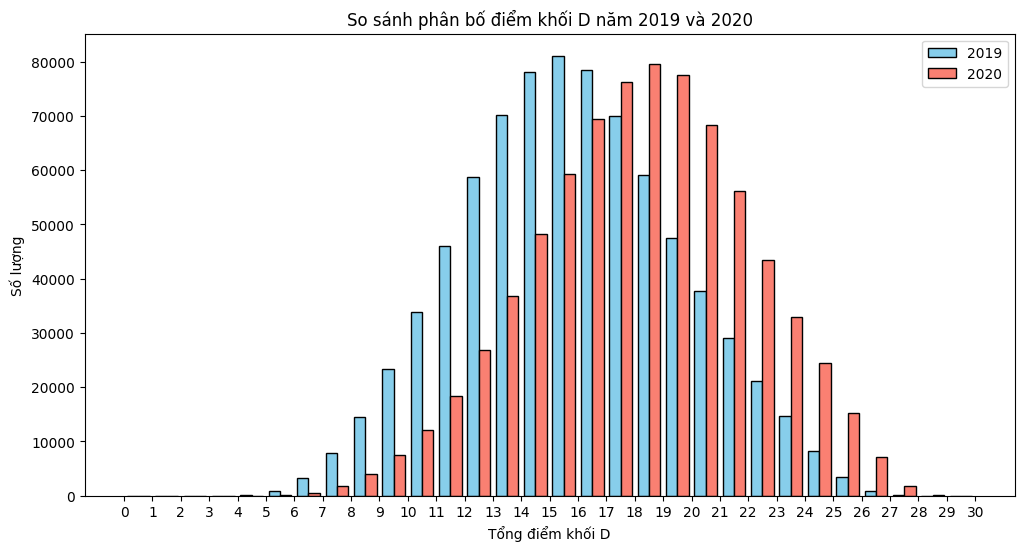

In [37]:
# Tạo các bins
bins = np.arange(0, 31)

khoi_D_2019 = df8[df8['nam_thi'] == 2019]['khoi_D']
khoi_D_2020 = df8[df8['nam_thi'] == 2020]['khoi_D']

# Vẽ biểu đồ cột đôi
plt.hist([khoi_D_2019, khoi_D_2020], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', rwidth=0.8)

# Thêm nhãn và tiêu đề
plt.xlabel('Tổng điểm khối D')
plt.ylabel('Số lượng')
plt.title('So sánh phân bố điểm khối D năm 2019 và 2020')

# Thêm chú thích
plt.legend(['2019', '2020'])

# Điều chỉnh trục x
plt.xticks(np.arange(0, 31))

# Hiển thị biểu đồ
plt.show()

### 9. Phổ điểm các môn 2020

In [38]:
# Lọc dữ liệu điểm thi 2020
df9 = df[df['nam_thi'] == '2020']

In [39]:
df9.tail(3)

,nam_thi,sbd,toan,ngu_van,vat_ly,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,ngoai_ngu,ma_mon_ngoai_ngu
3538526,2020,64005819,9.2,7.25,5.50,8.0,7.75,NaN,NaN,NaN,7.6,N1
3538527,2020,64005820,7.0,6.75,7.25,4.5,4.75,NaN,NaN,NaN,2.2,N1
3538528,2020,64005821,6.8,7.00,NaN,NaN,NaN,5.75,6.5,7.25,3.4,N1


#### 9.1. Phổ điểm môn thi bắt buộc năm 2020

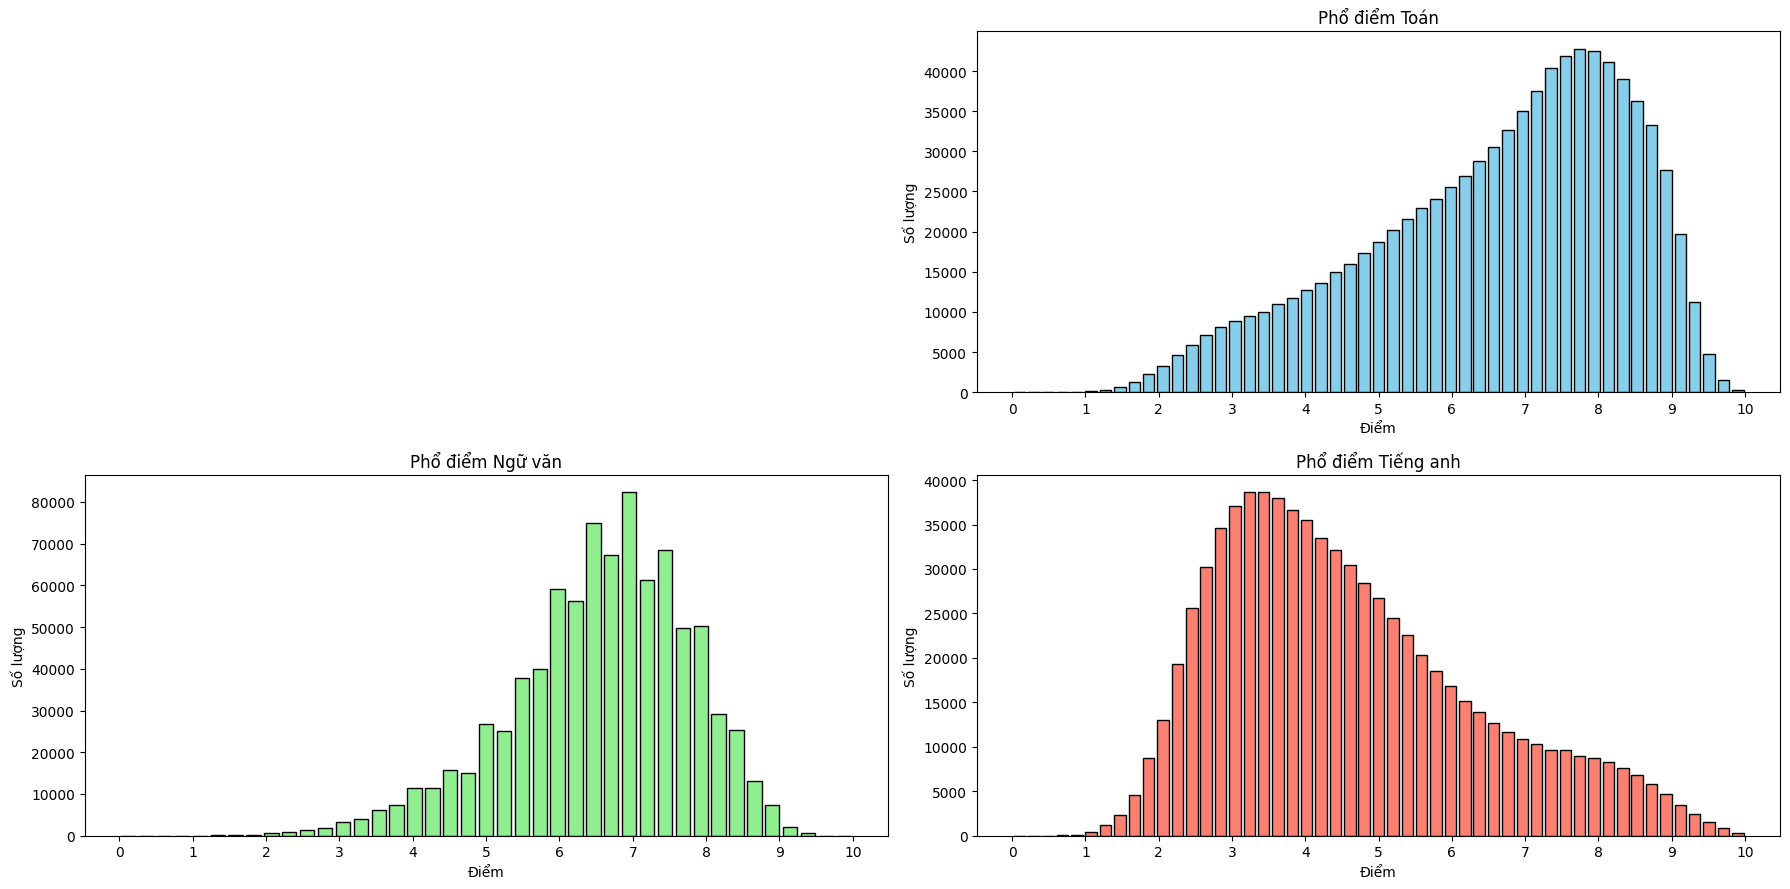

In [40]:
plt.figure(figsize=(18, 9))

# Danh sách các môn học và màu sắc tương ứng
subjects = ['toan', 'ngu_van', 'ngoai_ngu']
titles = ['Phổ điểm Toán', 'Phổ điểm Ngữ văn', 'Phổ điểm Tiếng anh']
colors = ['skyblue', 'lightgreen', 'salmon']

# Vẽ các biểu đồ con
# Góc trên bên phải: Môn Toán
plt.subplot(2, 2, 2)  # Hàng 1, cột 2
plt.hist(df9['toan'], bins=51, color='skyblue', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Toán')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên trái: Môn Ngữ văn
plt.subplot(2, 2, 3)  # Hàng 2, cột 1
plt.hist(df9['ngu_van'], bins=41, color='lightgreen', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Ngữ văn')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên phải: Môn Tiếng anh
plt.subplot(2, 2, 4)  # Hàng 2, cột 2
plt.hist(df9['ngoai_ngu'], bins=51, color='salmon', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Tiếng anh')
plt.xticks(np.arange(0, 10.2))

# Hiển thị toàn bộ các biểu đồ
plt.tight_layout()  # Tự động căn chỉnh các biểu đồ con
plt.show()


#### 9.2. Phổ điểm môn Khoa học Tự nhiên năm 2020

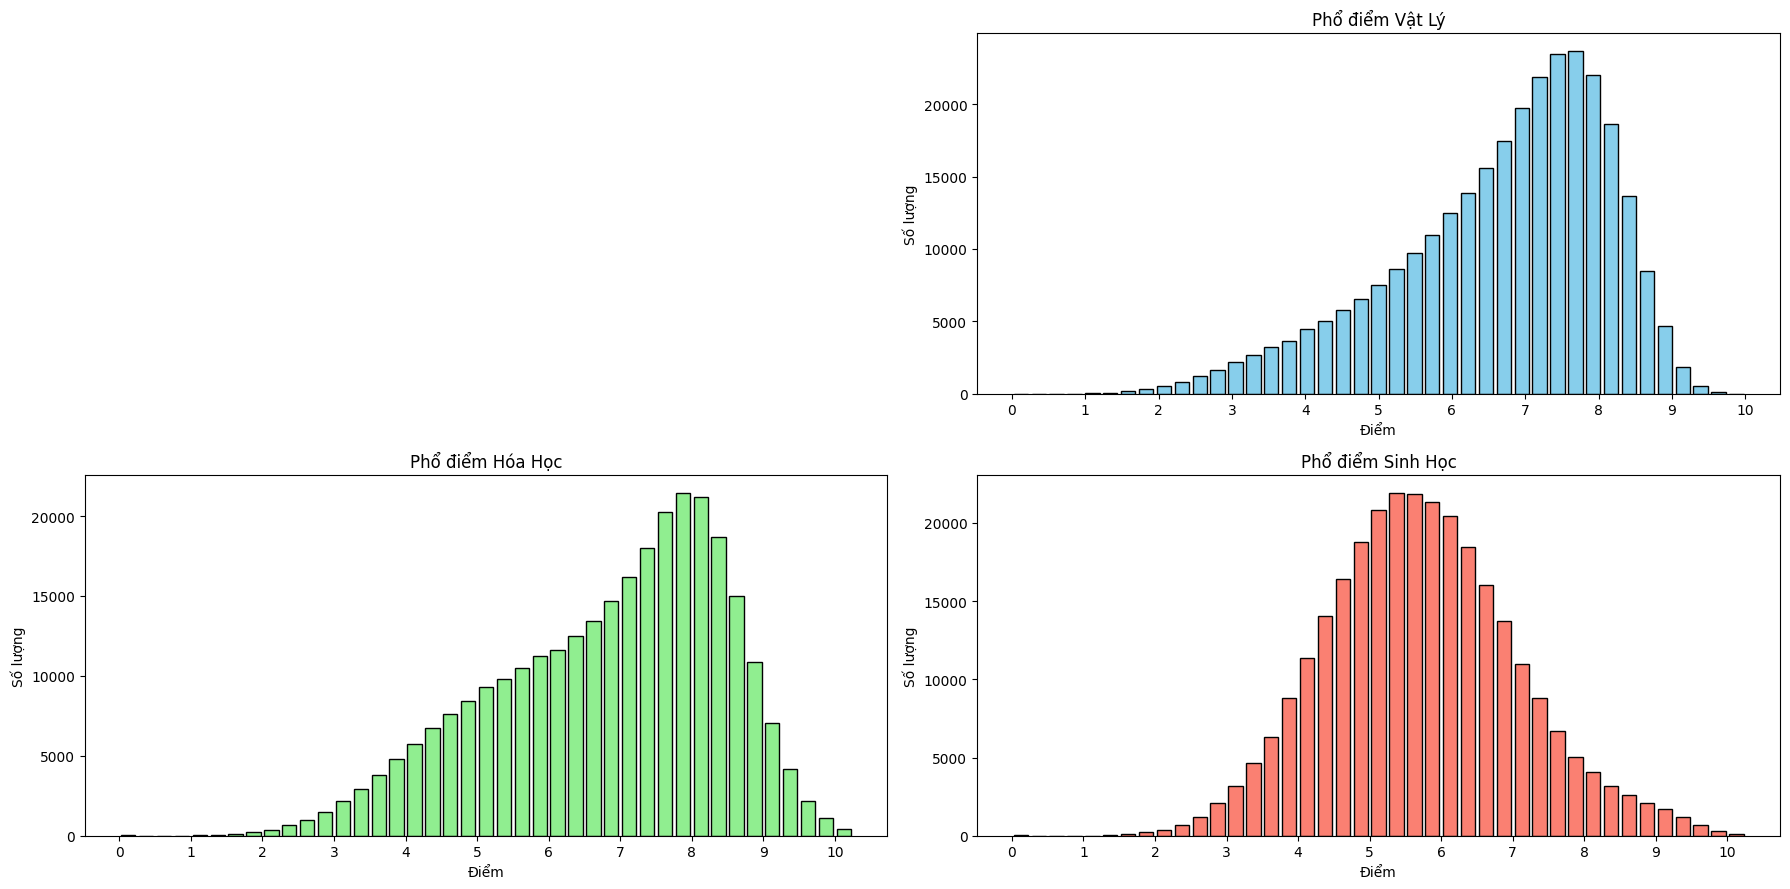

In [41]:
plt.figure(figsize=(18, 9))

# Danh sách các môn học và màu sắc tương ứng
subjects = ['vat_ly', 'hoa_hoc', 'sinh_hoc']
titles = ['Phổ điểm Vật Lý', 'Phổ điểm Hóa Học', 'Phổ điểm Sinh Học']
colors = ['skyblue', 'lightgreen', 'salmon']

# Vẽ các biểu đồ con
# Góc trên bên phải: Môn Vật Lý
plt.subplot(2, 2, 2)  # Hàng 1, cột 2
plt.hist(df9['vat_ly'], bins=41, color='skyblue', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Vật Lý')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên trái: Môn Hóa Học
plt.subplot(2, 2, 3)  # Hàng 2, cột 1
plt.hist(df9['hoa_hoc'], bins=np.arange(0, 10.5, 0.25), color='lightgreen', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Hóa Học')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên phải: Môn Sinh Học
plt.subplot(2, 2, 4)  # Hàng 2, cột 2
plt.hist(df9['sinh_hoc'], bins=np.arange(0, 10.5, 0.25), color='salmon', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Sinh Học')
plt.xticks(np.arange(0, 10.2))

# Hiển thị toàn bộ các biểu đồ
plt.tight_layout()  # Tự động căn chỉnh các biểu đồ con
plt.show()


#### 9.3. Phổ điểm môn Khoa học Xã hội năm 2020

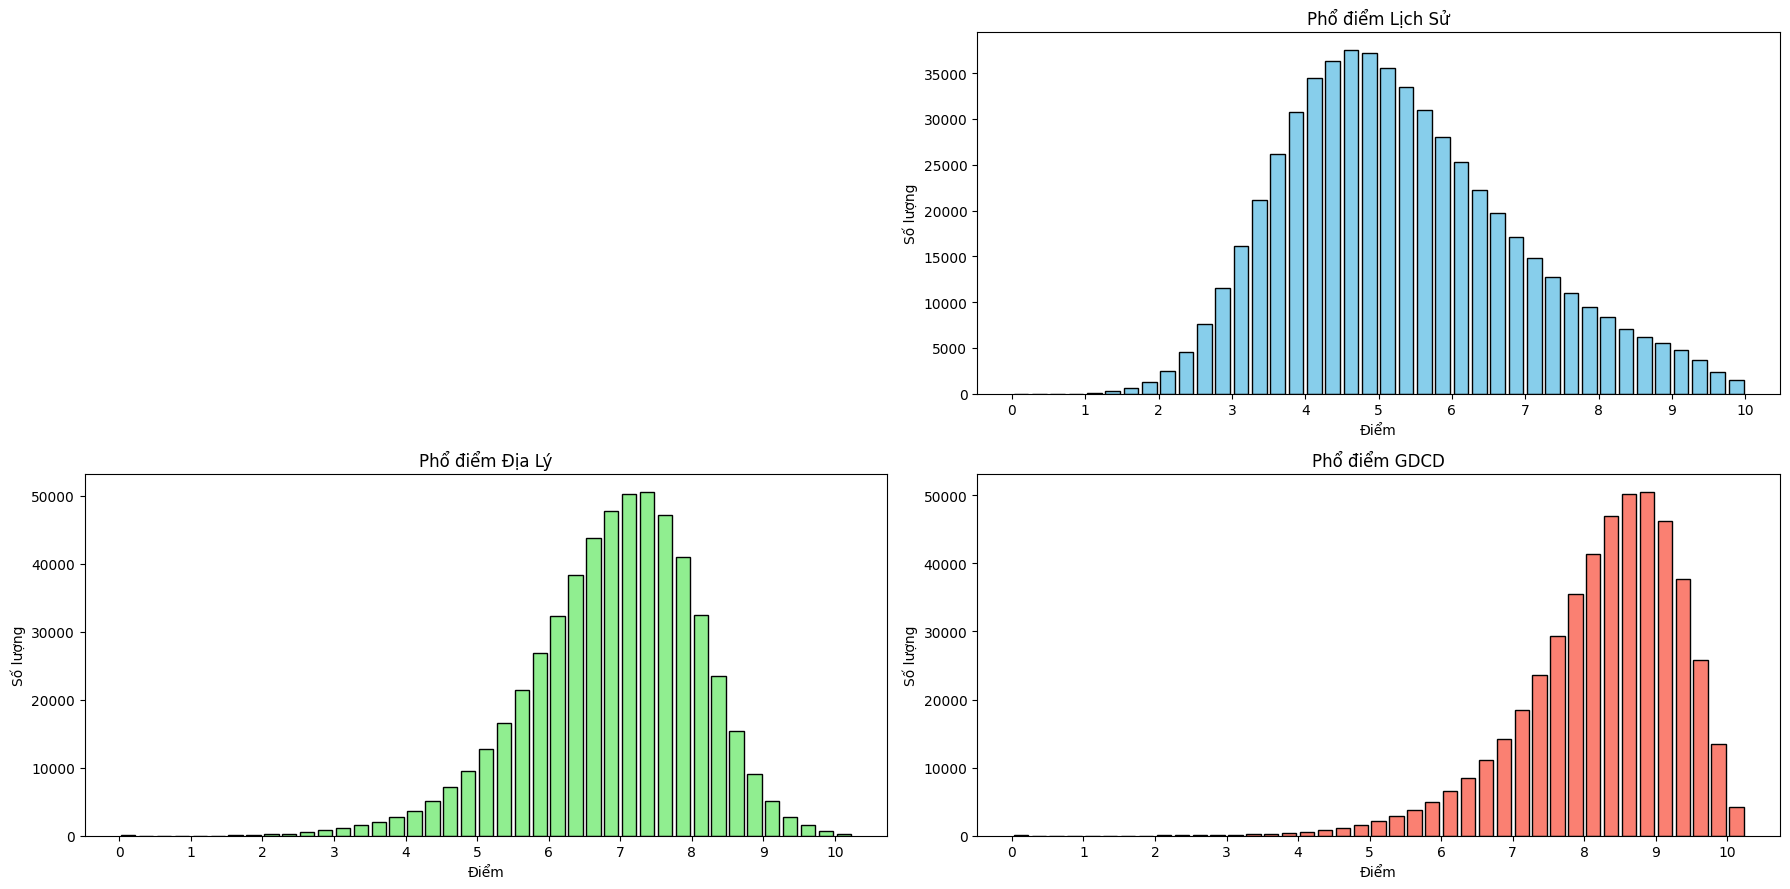

In [42]:
plt.figure(figsize=(18, 9))

# Danh sách các môn học và màu sắc tương ứng
subjects = ['lich_su', 'dia_ly', 'gdcd']
titles = ['Phổ điểm Lịch Sử', 'Phổ điểm Địa Lý', 'Phổ điểm GDCD']
colors = ['skyblue', 'lightgreen', 'salmon']

# Vẽ các biểu đồ con
# Góc trên bên phải: Môn Lịch Sử
plt.subplot(2, 2, 2)  # Hàng 1, cột 2
plt.hist(df9['lich_su'], bins=np.arange(0, 10.1, 0.25), color='skyblue', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Lịch Sử')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên trái: Môn Địa Lý
plt.subplot(2, 2, 3)  # Hàng 2, cột 1
plt.hist(df9['dia_ly'], bins=np.arange(0, 10.5, 0.25), color='lightgreen', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm Địa Lý')
plt.xticks(np.arange(0, 10.2))

# Góc dưới bên phải: Môn GDCD
plt.subplot(2, 2, 4)  # Hàng 2, cột 2
plt.hist(df9['gdcd'], bins=np.arange(0, 10.5, 0.25), color='salmon', edgecolor='black', rwidth=0.8)
plt.xlabel('Điểm')
plt.ylabel('Số lượng')
plt.title('Phổ điểm GDCD')
plt.xticks(np.arange(0, 10.2))

# Hiển thị toàn bộ các biểu đồ
plt.tight_layout()  # Tự động căn chỉnh các biểu đồ con
plt.show()
